# Reto 01: Librería de utilidades.

Dr. Antonio Arista.

Deberás de crear una librería de utilidades, y copiarla a un archivo de python (.py)

En este reto voy a probar que todas las funciones trabajen como esperamos, antes de copiarlas al archivo .py, ya que tenemos que asegurarnos que harán todo lo que necesitamos.

In [6]:
import numpy as np

## **Paso 1: Distancia euclidiana**
Lo primero será crear la distancia euclidiana, que usaremos a montones. La distancia euclidiana también puede llamarse la norma. Puedes usar tu fórmula original, pero esta es un poco más rápida.

In [7]:
#Distancia euclidiana
def distEuclidiana(muestra, dataset):
  distancias = np.zeros((dataset.shape[0],1))
  for counter in range(0, dataset.shape[0]):
    distancias[counter] = np.linalg.norm(muestra - dataset[counter])
  return distancias

In [8]:
#Prueba de distancia euclidiana:
muestra = np.array([1,2,3,4])
dataset = np.array([[1,2,3,4],
                   [2,3,4,5],
                    [3,4,5,6]])
distancias = distEuclidiana(muestra, dataset)
print(distancias)

[[0.]
 [2.]
 [4.]]


## **Paso 2: Obtener el centroide mas cercano**
En esa función, vamos a necesitar obtener el centroide más cerano de entre una lista. Esto se logra con "argmin"

In [9]:
def centroideCercano(muestra, listaCentroides):
  listaDistancias = distEuclidiana(muestra, listaCentroides)
  centroideCercano = np.argmin(listaDistancias)
  return centroideCercano

In [10]:
#Prueba de centroide más cercano
muestra = np.array([1,2,3,4])
centroides = np.array([[1,2,3,4],
                       [2,3,4,5],
                       [3,4,5,6]])
resultado = centroideCercano(muestra, centroides)
print('El centroide mas cercano es: ', str(resultado))

El centroide mas cercano es:  0


## **Paso 3: Repetir eso para todas las muestras**
En esta función vamos a utilizar la funcion "centroideCercano" para clasificar todas las muestras

In [11]:
def clasificarPorCentroides(muestras, centroides):
  resultado = np.zeros((muestras.shape[0], 1))
  for counter in range(0, muestras.shape[0]):
    resultado[counter] = centroideCercano(muestras[counter], centroides)
  return resultado

In [12]:
#Prueba de todos los centroides vs todas las muestras
muestras = np.array([[1,2,3,4],
                     [2,3,4,5],
                     [3,4,5,6]])

centroides = np.array([[1,2,3,4],
                       [2,3,4,5],
                       [3,4,5,6]])

resultados = clasificarPorCentroides(muestras, centroides)
print(resultados)

[[0.]
 [1.]
 [2.]]


# Reto 02
**Dr. Antonio Arista Jalife**

Este reto consiste en agrandar la librería de MLUtilites.py para crear poco a poco un sistema de recomendaciones. Primero hemos de crear una función que separe datos.

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

**Separación de datos**

Esta función separa datos dependiendo de la etiqueta de valor esperado que tengan

In [14]:
def separarDatos(muestras, valoresEsperados, valorAFiltrar):
  indices = np.where(valoresEsperados == valorAFiltrar)
  return muestras[indices], valoresEsperados[indices]

Prueba de la separación de datos

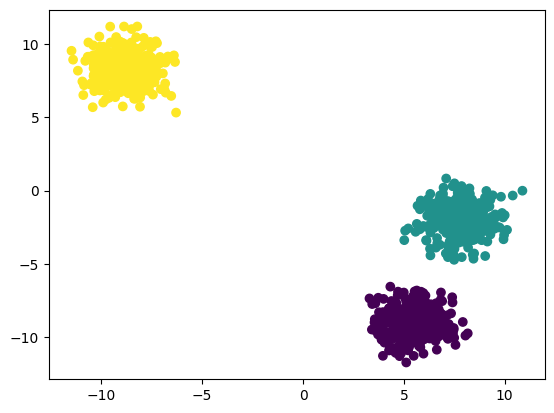

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
x, y = make_blobs(n_samples=1000, centers=3, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

muestrasCon1, valoresEsperadosCon1 = separarDatos(x,y,1)
print(valoresEsperadosCon1)

In [16]:
import os
import sys
sys.path.append('/content/drive/MyDrive/DataSets3_TCH/')
import MLUtilities as utils
from scipy import stats

### **Código para obtener moda**

(Extraído del ejemplo 01 / ayuda para el reto 02)

In [17]:
def obtenerModa(resultados):
    moda = (stats.mode(resultados)[0]).reshape(-1)
    return moda[0]

### **Código para obtener la accuracy de una muestra con K medias**
Este código primero extrae el numero de muestras, luego los resultados de clasificación, luego la moda y busca con np.where donde los resultados son diferentes a la moda, esos son los indices de errores.

Luego entonces, la cantidad de errores es el tamaño de los resultados donde los indicesErrores apuntan. finalmente, la Accuracy la calculamos como:
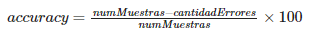

In [18]:
def obtenerAccuracy_kmedias(muestras, centroides):
    numMuestras = muestras.shape[0]

    resultados = utils.clasificarPorCentroides(muestras, centroides)
    moda = obtenerModa(resultados)

    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])
    accuracy = ((numMuestras - cantidadErrores) / numMuestras) *100
    return accuracy

### **Prueba de la función de obtener Accuracy**
Para ello, observa el scatter plot de arriba, y elige los centroides manualmente con "centroidesDummy". si pones el centroide dummy 1 y 2 muy cerca, la accuracy va a bajar considerablemente. si pones el centroide dummy 1 enmedio de una clase, y el centroide 2 muy lejos, la accuracy será de 100%

In [19]:
centroidesDummy = np.array([[-4,-9]       #Centroide dummy 1
                            ,[-5,-10]])   #Centroide dummy 2
accuracy = obtenerAccuracy_kmedias(muestrasCon1,centroidesDummy)
print(accuracy)

100.0
